# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

**Business Objectives:**

Some important objectives of a used car dealership could be:

- Understand what are the main drivers of price in a used car (the main one, as mentioned above)
- Improve profit on each sale
- Optimize inventory to make sure all cars have a higher chance of sell (at a highest price possible)


### Data Problem Definition

Understand the key features that drive the price of a car. In order to do that, a univariate and multivariate analysis can be made on the given dataset (the business database) to create and train a predictive model that can accurately (hopefully) calcuate the price of a car.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [160]:
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler, OrdinalEncoder
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn import set_config

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import time
import warnings
from sklearn import set_config

warnings.filterwarnings("ignore")

set_config(display="diagram")


#### Intial Analysis

In [161]:
vehicles_df = pd.read_csv('data/vehicles.csv')
vehicles_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


*thoughts:* I see a bunch of nulls right away...

In [162]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

*thoughts:* I see a bunch of categorical variables, some transformations will be needed...

In [163]:
vehicles_df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


*thoughts:* There are some records with price of $0. Needs to be investigated...

#### Looking deeper into issues found so far

In [164]:
vehicles_df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [165]:
vehicles_df[vehicles_df['price'] == 0]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
10,7218893038,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
11,7218325704,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
12,7217788283,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
13,7217147606,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
14,7209027818,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426764,7303347225,wyoming,0,2018.0,NaN,peterbilt 579,NaN,NaN,diesel,1.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy
426812,7302877815,wyoming,0,2006.0,toyota,scion tc,excellent,4 cylinders,gas,195000.0,clean,automatic,JTKDE177460109655,fwd,NaN,NaN,silver,wy
426832,7302353283,wyoming,0,2004.0,toyota,prius,excellent,4 cylinders,hybrid,239000.0,clean,automatic,JTDKB20U840108051,fwd,NaN,NaN,blue,wy
426836,7302301268,wyoming,0,2018.0,ram,2500,excellent,6 cylinders,diesel,20492.0,clean,automatic,3C6UR5HL3JG307217,4wd,full-size,truck,white,wy


#### Removing nulls and "free stuff"

In [166]:
vehicles_df = vehicles_df.dropna()
vehicles_df = vehicles_df[vehicles_df['price'] != 0]

#### Understanding the business' data

*Creating functions to standarize the visualizations*

In [298]:
def plot_hist(df, title): 

    # create the displot
    sns.displot(df, color='orange', edgecolor='red')

    # rotate the x-axis labels
    plt.xticks(rotation=90)

    # title
    plt.title(title)

    filename = title.replace(' ', '_').lower() + '.png'
    plt.savefig('images/' + filename, dpi=300)

    # show the plot
    plt.show()

def plot_scatter(df, x, y, xlabel, ylabel, title, hue=None, alpha=0.5): 

    # Set the style and color palette of the plot
    sns.set(style="whitegrid")
    sns.set_palette("viridis")  # Change the color palette to coolwarm

    # Create the scatter plot
    sns.scatterplot(x=x, y=y, data=df, hue=hue, alpha=alpha)  # Set the marker transparency to 0.7

    # Set the title and labels
    plt.title(title)  # Increase the font size and add bold style
    plt.xlabel(xlabel, fontsize=12)  # Increase the font size
    plt.ylabel(ylabel, fontsize=12)  # Increase the font size
    
    # rotate the x-axis labels
    plt.xticks(rotation=90)

    # Remove the right and top spines
    sns.despine()

    filename = title.replace(' ', '_').lower() + '.png'
    plt.savefig('images/' + filename, dpi=300)

    # Display the plot
    plt.show()

def plot_bar(df, x, y, xlabel, ylabel, title, alpha=0.5, figsize=(15, 5)):
    
    
    sns.set(style="whitegrid")

    # Set the figure size
    plt.figure(figsize=figsize)

    # Set the style and color palette of the plot
    sns.set_palette("viridis")  # Use the pastel color palette

    # Create the bar plot
    barplot = sns.barplot(x=x, y=y, data=df, alpha=alpha)

    # Set the title and labels
    plt.title(title, fontsize=16, fontweight='bold')  # Increase the font size and add bold style
    plt.xlabel(xlabel, fontsize=12)  # Increase the font size
    plt.ylabel(ylabel, fontsize=12)  # Increase the font size

    # Customize the tick labels on the x-axis
    barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)  # Rotate and align the labels

    # Remove the right and top spines
    sns.despine()

    # Adjust the layout
    plt.tight_layout()

    filename = title.replace(' ', '_').lower() + '.png'
    plt.savefig('images/' + filename, dpi=300)

    # Display the plot
    plt.show()

def plot_box(df, x, y, xlabel, ylabel, title, hue=None, figsize=(15, 5), save=True):

    filename = title.replace(' ', '_').lower() + '.png'

    sns.set(style="whitegrid")

    # Set the figure size
    plt.figure(figsize=figsize)

    # Create the violin plot
    violinplot = sns.boxplot(x=x, y=y, data=df, hue=hue, palette='Set3')

    # Set the title and labels
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    # Customize the tick labels on the x-axis
    violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)

    # Customize the legend
    if hue:
        violinplot.legend(title=hue, fontsize=10, title_fontsize=12)

    # Remove the right and top spines
    sns.despine()

    if save:
        plt.savefig('images/' + filename, dpi=300)

    # Display the plot
    plt.show()

def plot_violin(df, x, y, xlabel, ylabel, title, hue=None, figsize=(10, 8)):
    sns.set(style="whitegrid")

    # Set the figure size
    plt.figure(figsize=figsize)

    # Create the violin plot
    violinplot = sns.violinplot(x=x, y=y, data=df, hue=hue, palette='Set3')

    # Set the title and labels
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    # Customize the tick labels on the x-axis
    violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)

    # Customize the legend
    if hue:
        violinplot.legend(title=hue, fontsize=10, title_fontsize=12)

    # Remove the right and top spines
    sns.despine()

    filename = title.replace(' ', '_').lower() + '.png'
    plt.savefig('images/' + filename, dpi=300)

    # Display the plot
    plt.show()

def plot_boxen(df, x, y, xlabel, ylabel, title, hue=None, figsize=(10, 8)):
    sns.set(style="whitegrid")

    # Set the figure size
    plt.figure(figsize=figsize)

    # Create the violin plot
    violinplot = sns.boxenplot(x=x, y=y, data=df, hue=hue, palette='Set3')

    # Set the title and labels
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    # Customize the tick labels on the x-axis
    violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)

    # Customize the legend
    if hue:
        violinplot.legend(title=hue, fontsize=10, title_fontsize=12)

    # Remove the right and top spines
    sns.despine()

    filename = title.replace(' ', '_').lower() + '.png'
    plt.savefig('images/' + filename, dpi=300)
    
    # Display the plot
    plt.show()


**Univariate Analysis**

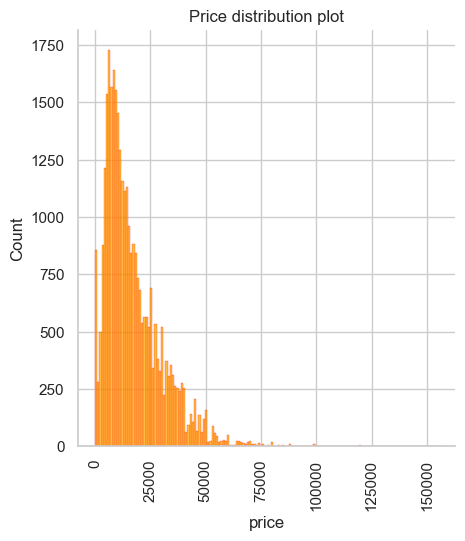

In [168]:
plot_hist(vehicles_df['price'], 'Price distribution plot')

*thoughts:* Price is skewed, most likely some luxury cars are present in the dataset

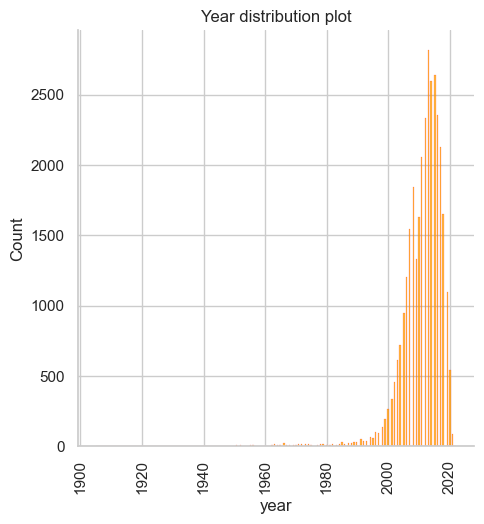

In [169]:
# create the displot

plot_hist(vehicles_df['year'], 'Year distribution plot')

*thoughts:* Year is skewed, most likely some pretty old cars are present in the dataset

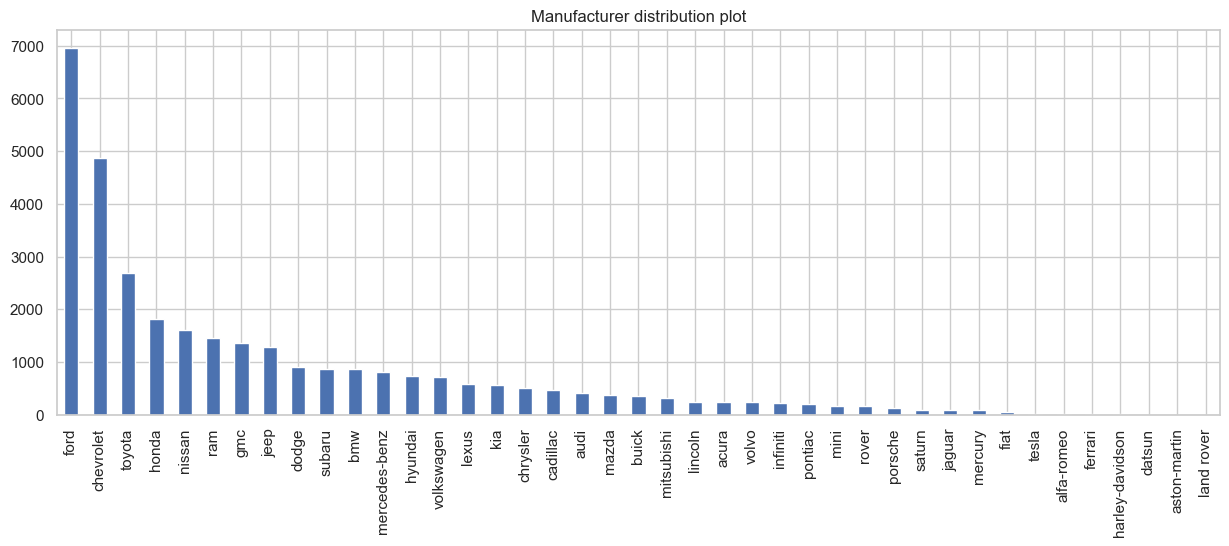

In [170]:
# manufacturer sort by count
vehicles_df['manufacturer'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(15, 5))
plt.title('Manufacturer distribution plot')
plt.show()


*thoughts:* Some manufacturers have a very low record count (luxury cars included). Make sense I guess... 

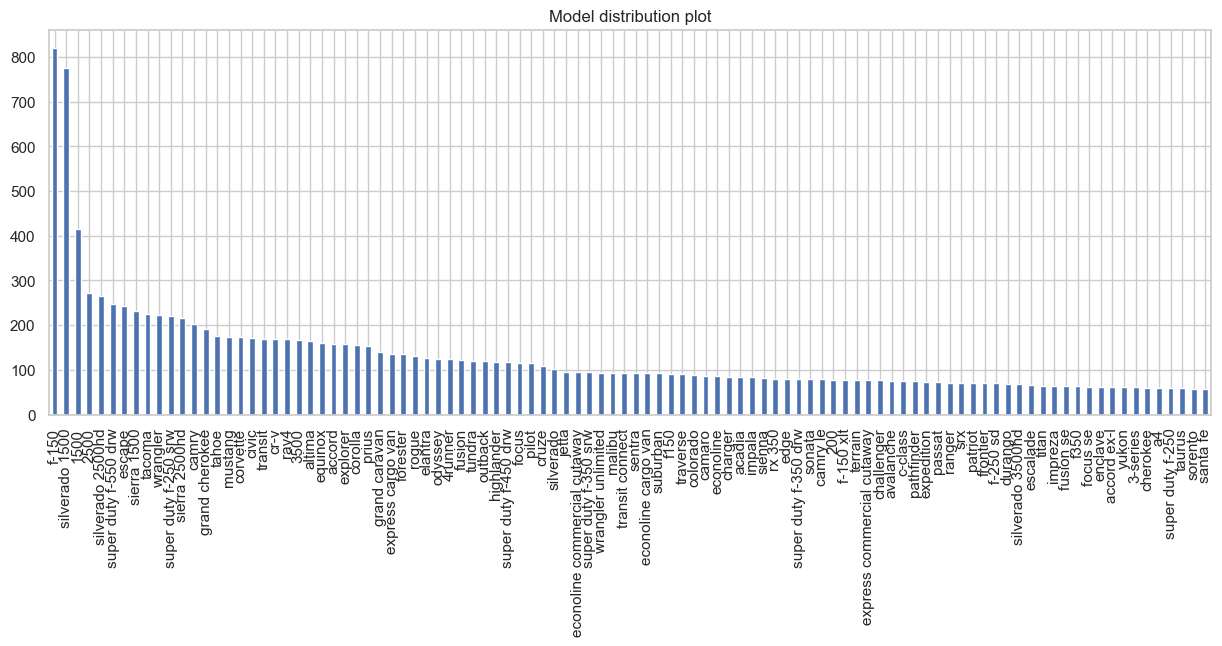

In [171]:
# manufacturer sort by count
vehicles_df['model'].value_counts().sort_values(ascending=False).head(100).plot(kind='bar', figsize=(15, 5))
plt.title('Model distribution plot')
plt.show()

*thoughts:* The amount of models is insane... it's hard to know if there are "duplicated" models in here. I need to be careful about it...

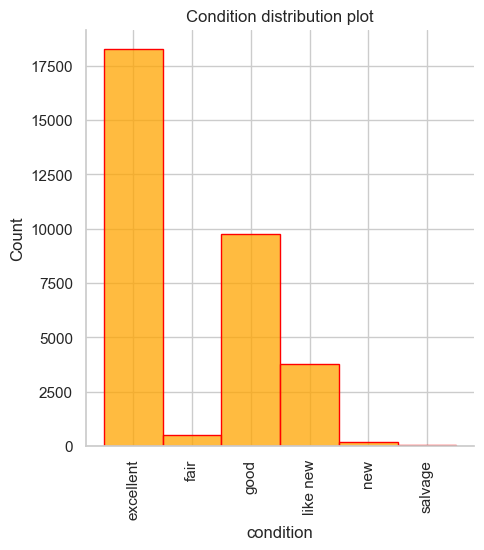

In [172]:
plot_hist(vehicles_df['condition'], 'Condition distribution plot')

*thoughts:* The business wants to predict used cards and I see "new" here.. I think should be removed...

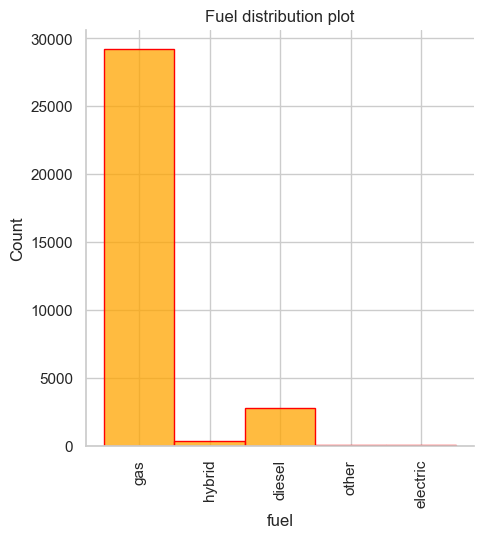

In [173]:
plot_hist(vehicles_df['fuel'], 'Fuel distribution plot')

*thoughts:* Mainly gas cards here, makes business sense...

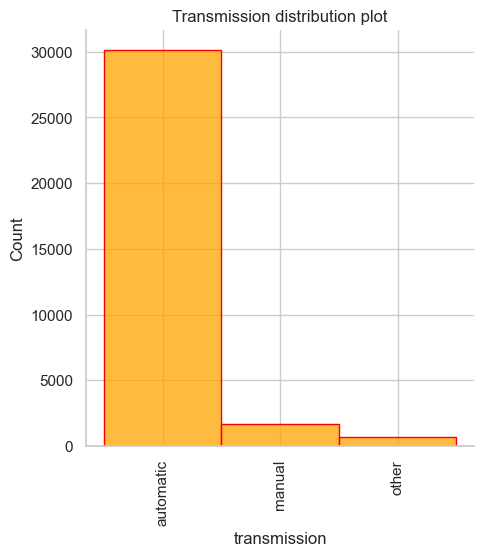

In [174]:
plot_hist(vehicles_df['transmission'], 'Transmission distribution plot')

*thoughts:* Automatic is most popular, makes sense too - "other" is electric maybe?

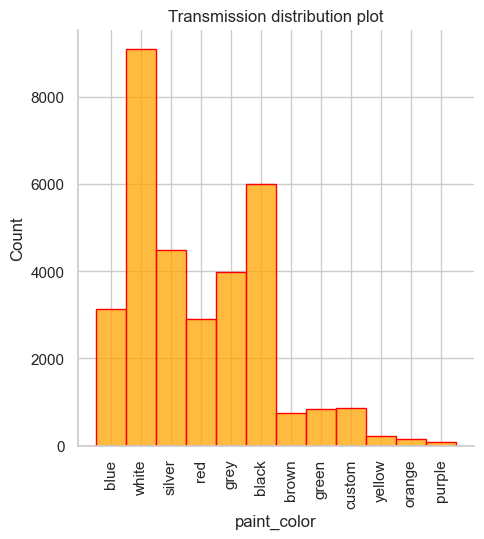

In [175]:
# sns.histplot(vehicles_df['paint_color'])
plot_hist(vehicles_df['paint_color'], 'Transmission distribution plot')

*thoughts:* There are some weird paint colors like yellow, orange or purple. Either from very old cars or from very expensive... that's my initial guess

#### Multivariate Analysis

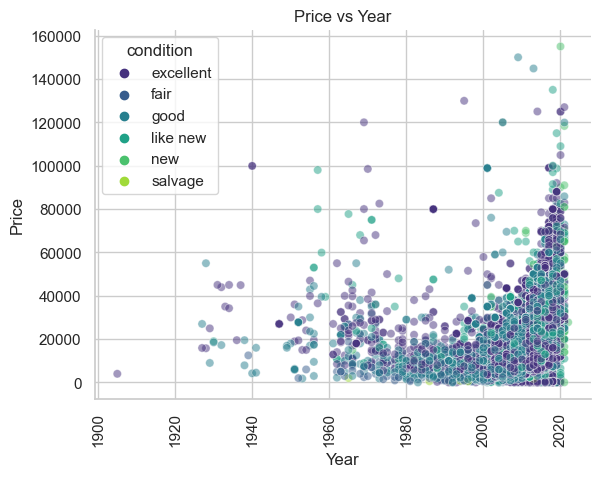

In [176]:
plot_scatter(vehicles_df, 'year', 'price', 'Year', 'Price', 'Price vs Year', hue='condition')

*thoughts:*  I see mostly dark green (fair/good conditions) and a fair amount of purple (excellent conditions). Seems like price (mostly) increases on newer cars

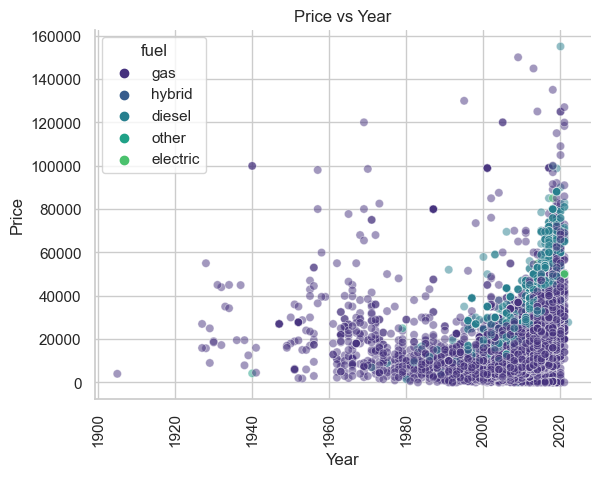

In [177]:
plot_scatter(vehicles_df, 'year', 'price', 'Year', 'Price', 'Price vs Year', hue='fuel')

*thoughts:*  Gas dominates, but it's important to notice how diesel cars are newer and more expensive - maybe trucks? 

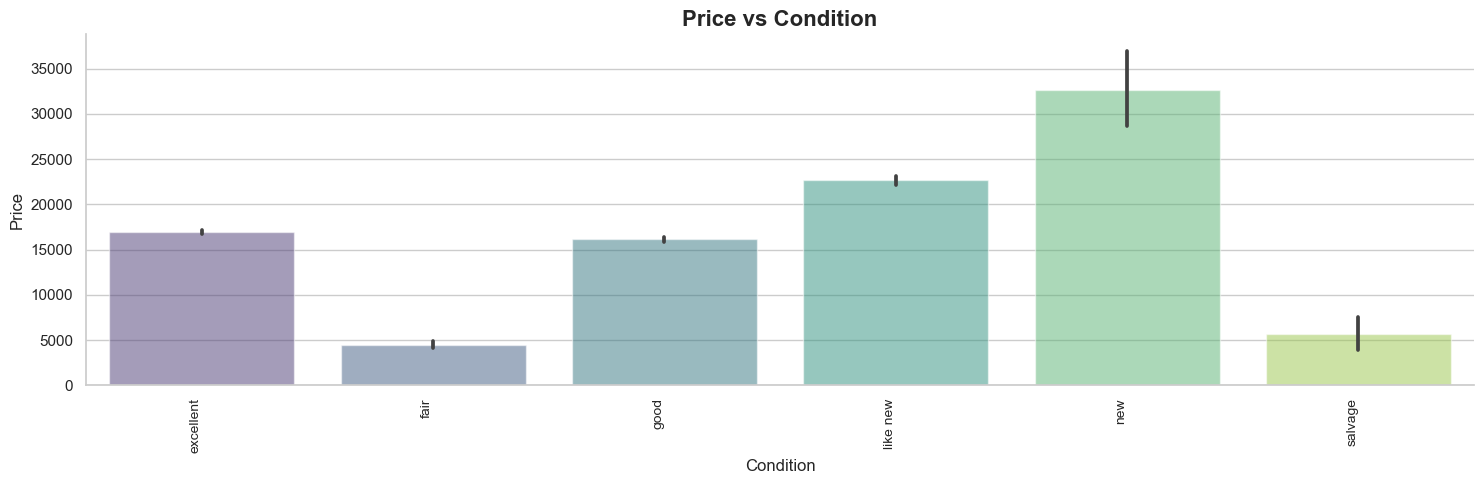

In [300]:
plot_bar(vehicles_df, 'condition', 'price', 'Condition', 'Price', 'Price vs Condition')

*thoughts:*  The newer the better price. Makes sense

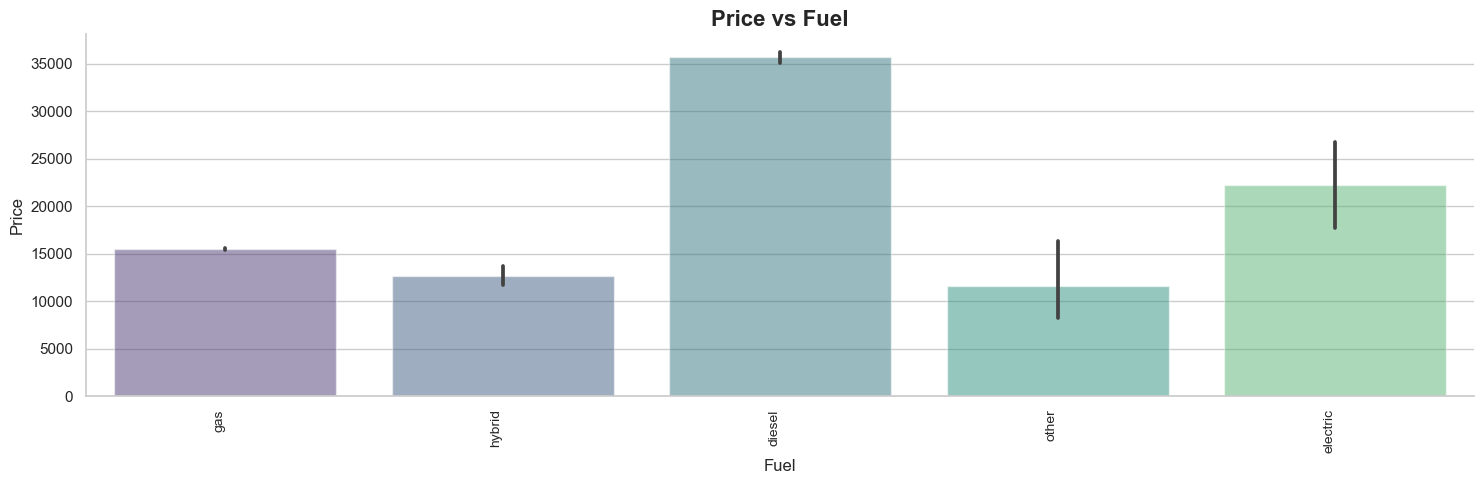

In [301]:
plot_bar(vehicles_df, 'fuel', 'price', 'Fuel', 'Price', 'Price vs Fuel')

*thoughts:*  Confirming diesel cars are the most expensive of all - but electric on second place is a newer insight

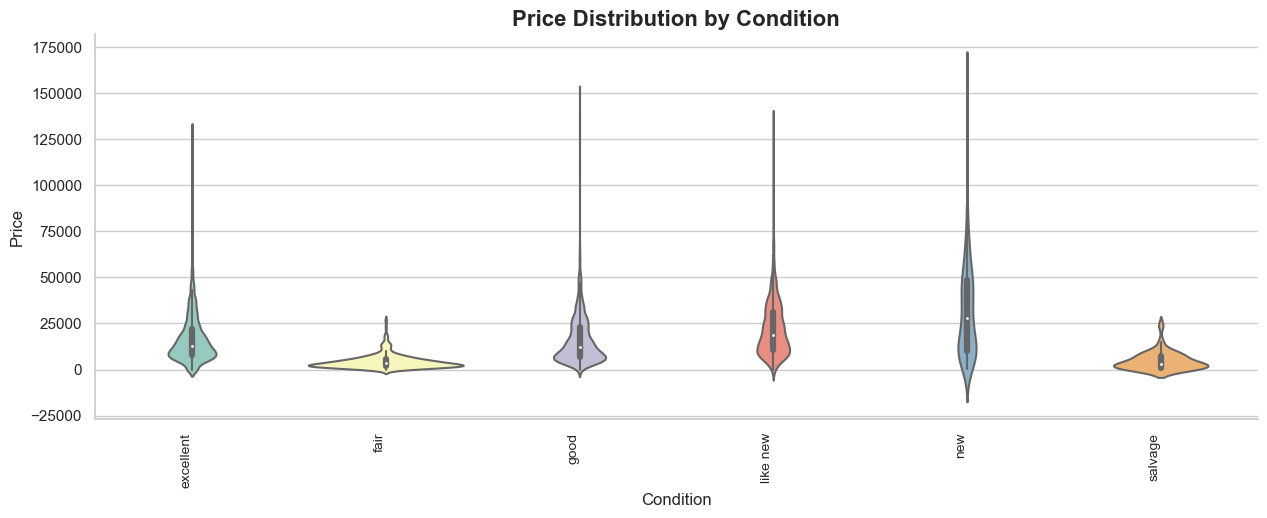

In [180]:
plot_violin(vehicles_df, 'condition', 'price', 'Condition', 'Price', 'Price Distribution by Condition', figsize=(15, 5))

*thoughts:*  Most of the cars are low quality (not a ton of revenue here). For the business, is important to get the most of the good (or even better) cars. 

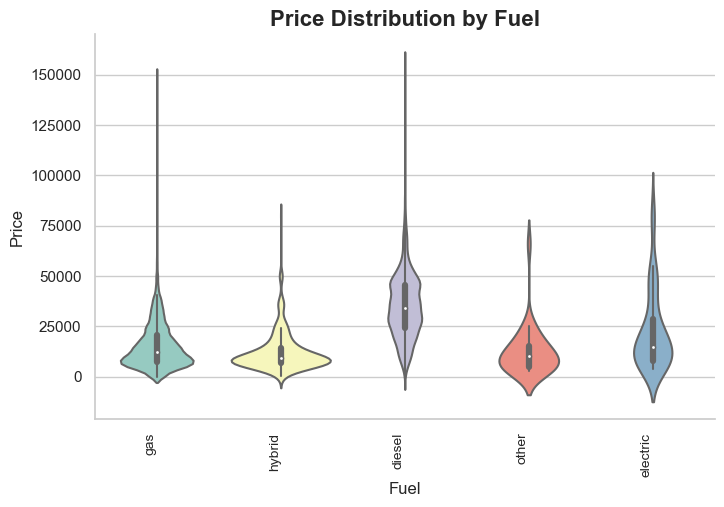

In [181]:
plot_violin(vehicles_df, 'fuel', 'price', 'Fuel', 'Price', 'Price Distribution by Fuel', figsize=(8, 5))

*thoughts:*  Hybrid distribution is insteresting

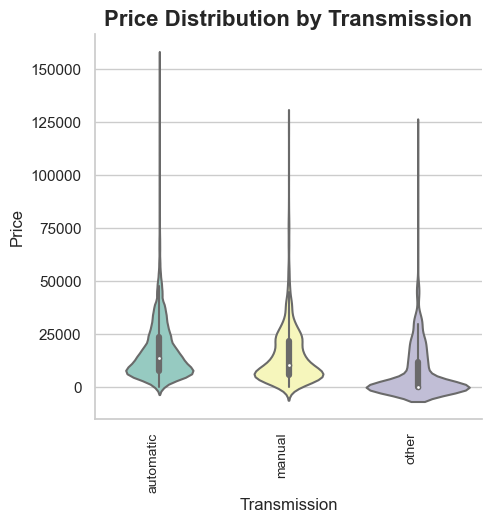

In [182]:
plot_violin(vehicles_df, 'transmission', 'price', 'Transmission', 'Price', 'Price Distribution by Transmission', figsize=(5, 5))

*thoughts:*  I wonder what "other" means for this dataset

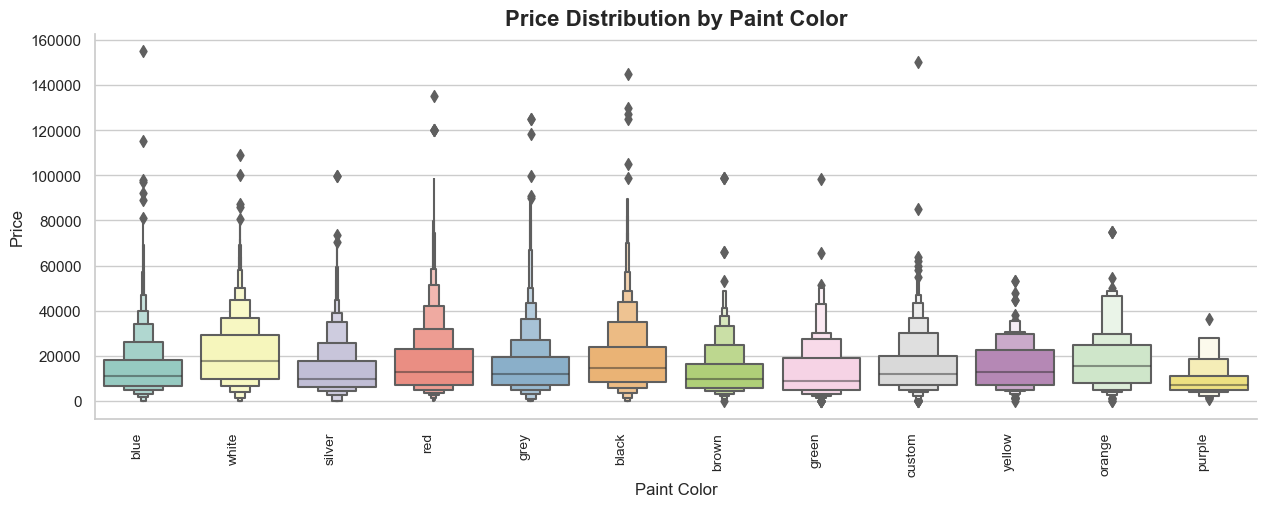

In [183]:
plot_boxen(vehicles_df, 'paint_color', 'price', 'Paint Color', 'Price', 'Price Distribution by Paint Color', figsize=(15, 5))

*thoughts:*  Seems like those purple cars are not as valuable...

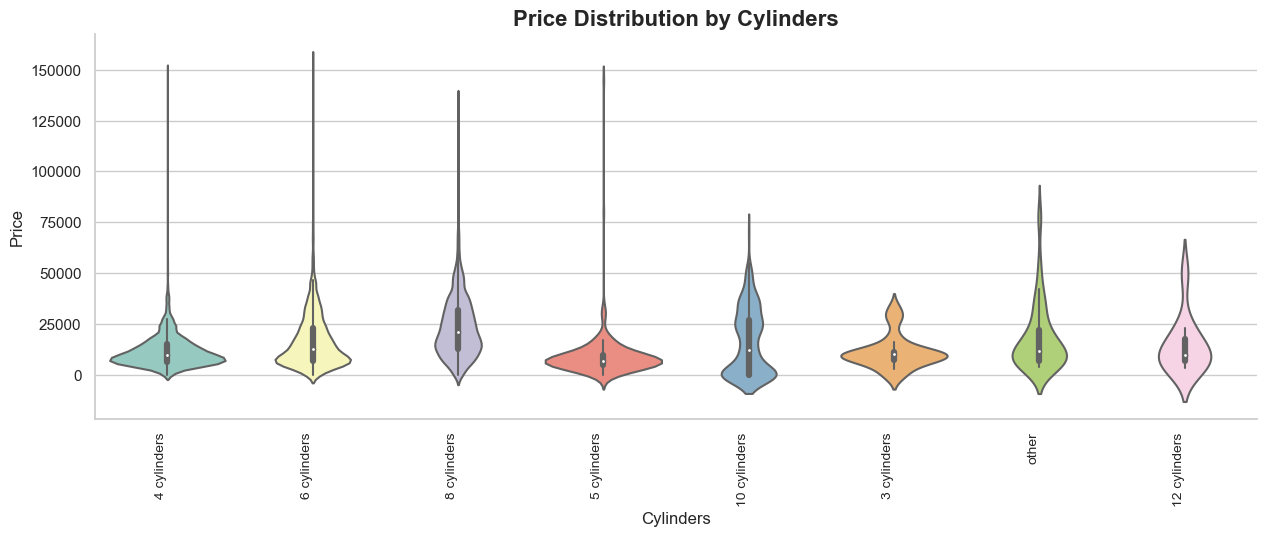

In [184]:
# plot_violin for cylinders
plot_violin(vehicles_df, 'cylinders', 'price', 'Cylinders', 'Price', 'Price Distribution by Cylinders', figsize=(15, 5))


*thoughts:*  the distribution of "other" is qyite similar to electic - I guess that makes sense?

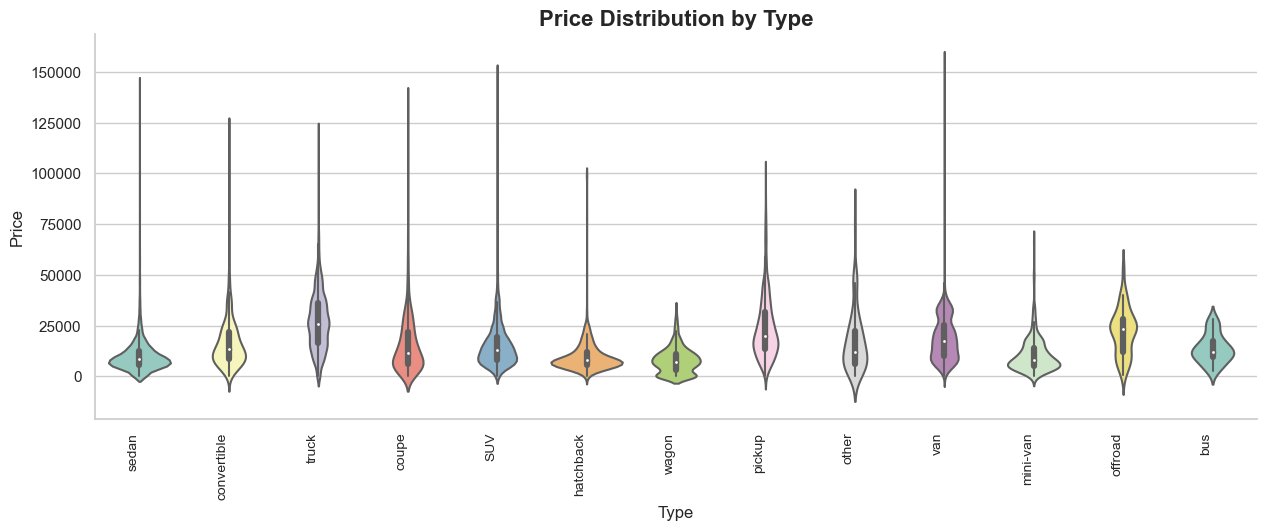

In [185]:
# plot_violin for type
plot_violin(vehicles_df, 'type', 'price', 'Type', 'Price', 'Price Distribution by Type', figsize=(15, 5))

*thoughts:*  Trucks, Vans, SUV are probably the ones using deisel? 

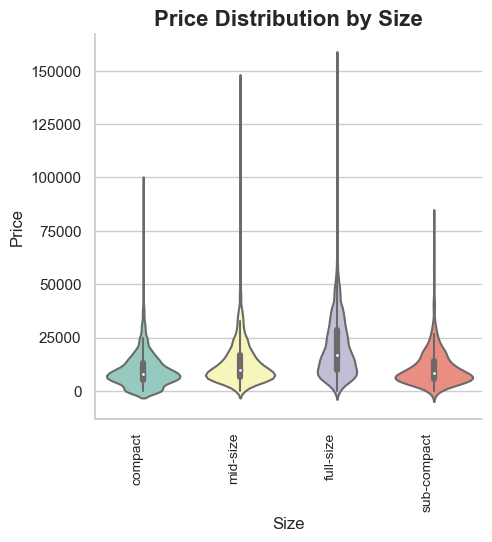

In [186]:
# plot_violin for size
plot_violin(vehicles_df, 'size', 'price', 'Size', 'Price', 'Price Distribution by Size', figsize=(5, 5))

*thoughts:*  Full-size, using deasel, the most expensive ones? 

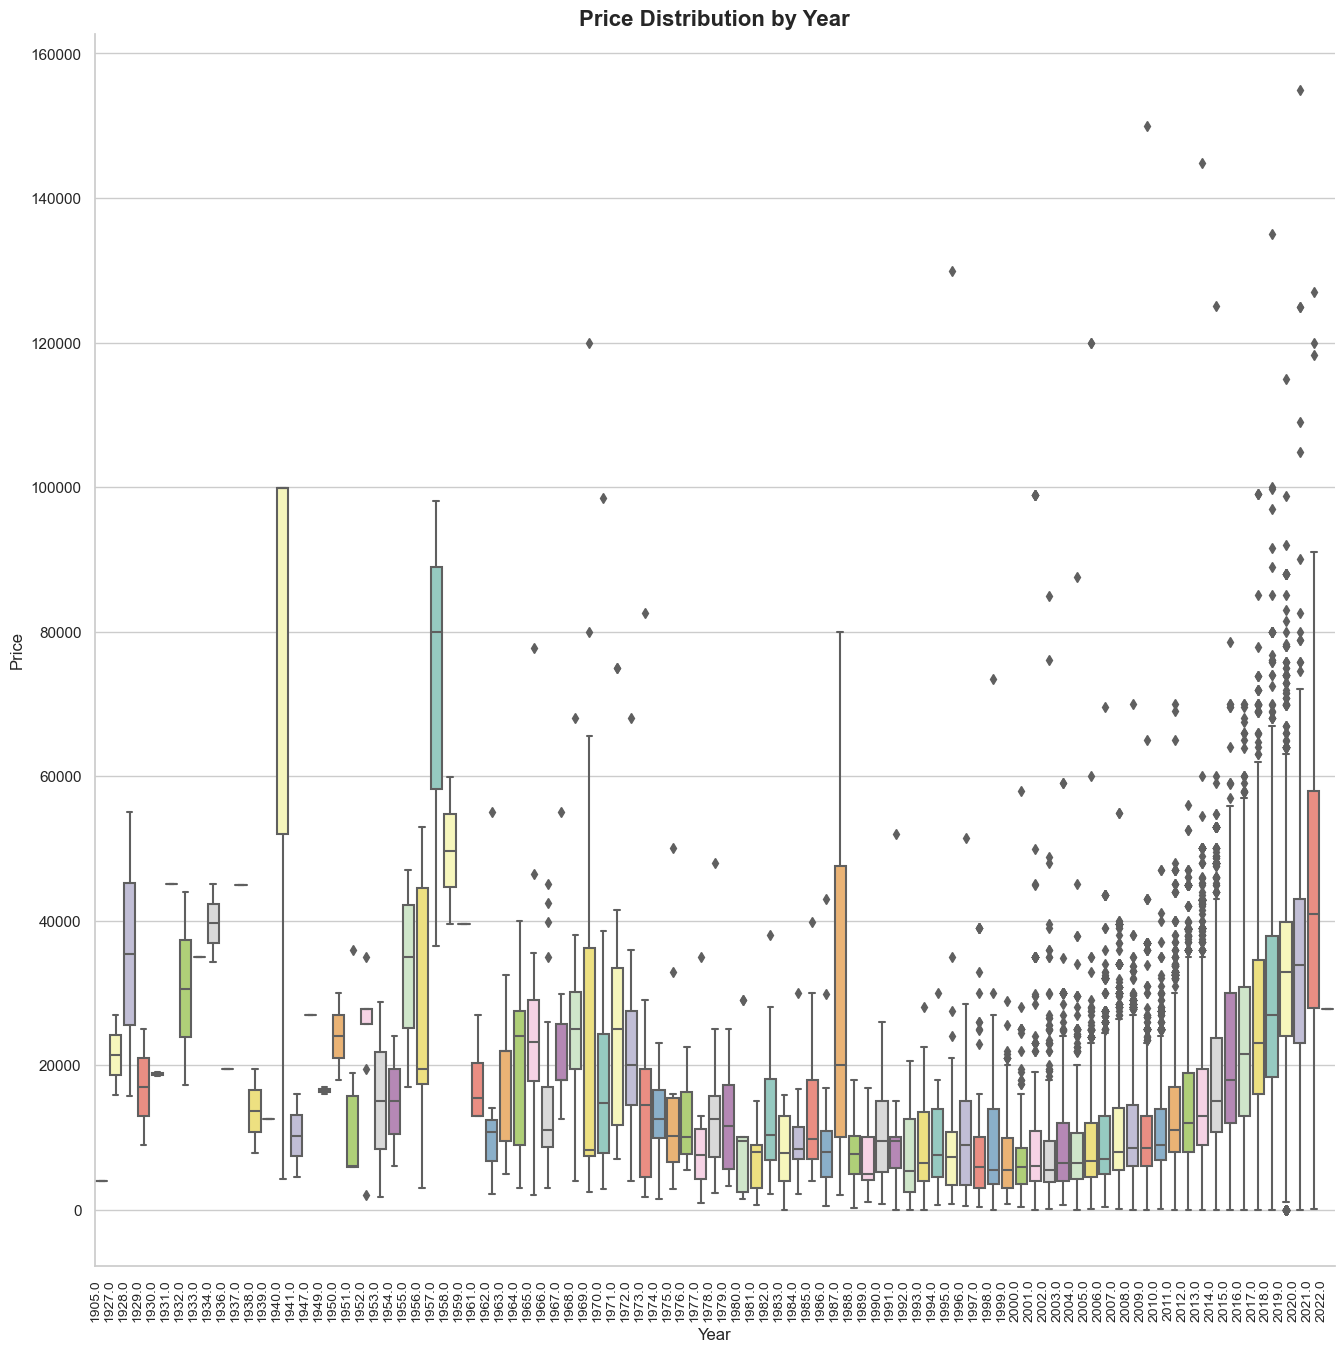

In [187]:
plot_box(vehicles_df.copy().sort_values(by='year'), 'year', 'price', 'Year', 'Price', 'Price Distribution by Year', figsize=(16, 16))

*thoughts:* Super old cars (prob considered reliques) are pretty expensive - aside from that, newer cars are more expensive. Makes sense.

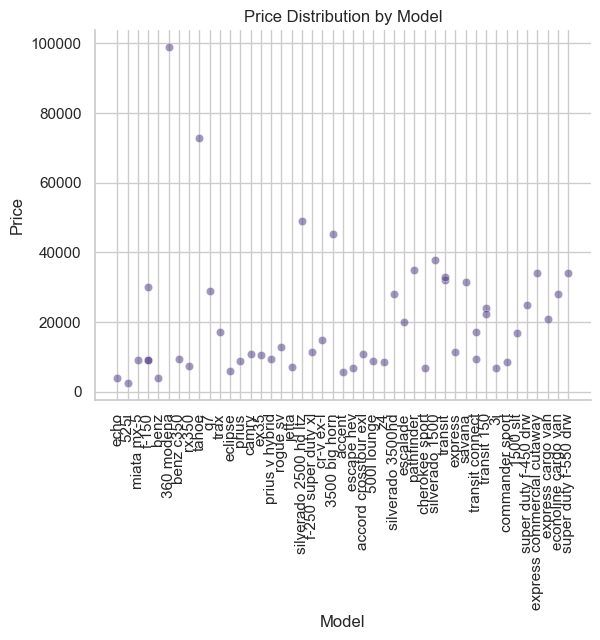

In [188]:

plot_scatter(vehicles_df.copy().head(50), 'model', 'price', 'Model', 'Price', 'Price Distribution by Model')

*thoughts:*  I'd need help from an expert to unpack the model dimension. Should I factorize it or apply one-hot enconding? One-hot might be too much given the amount of models...

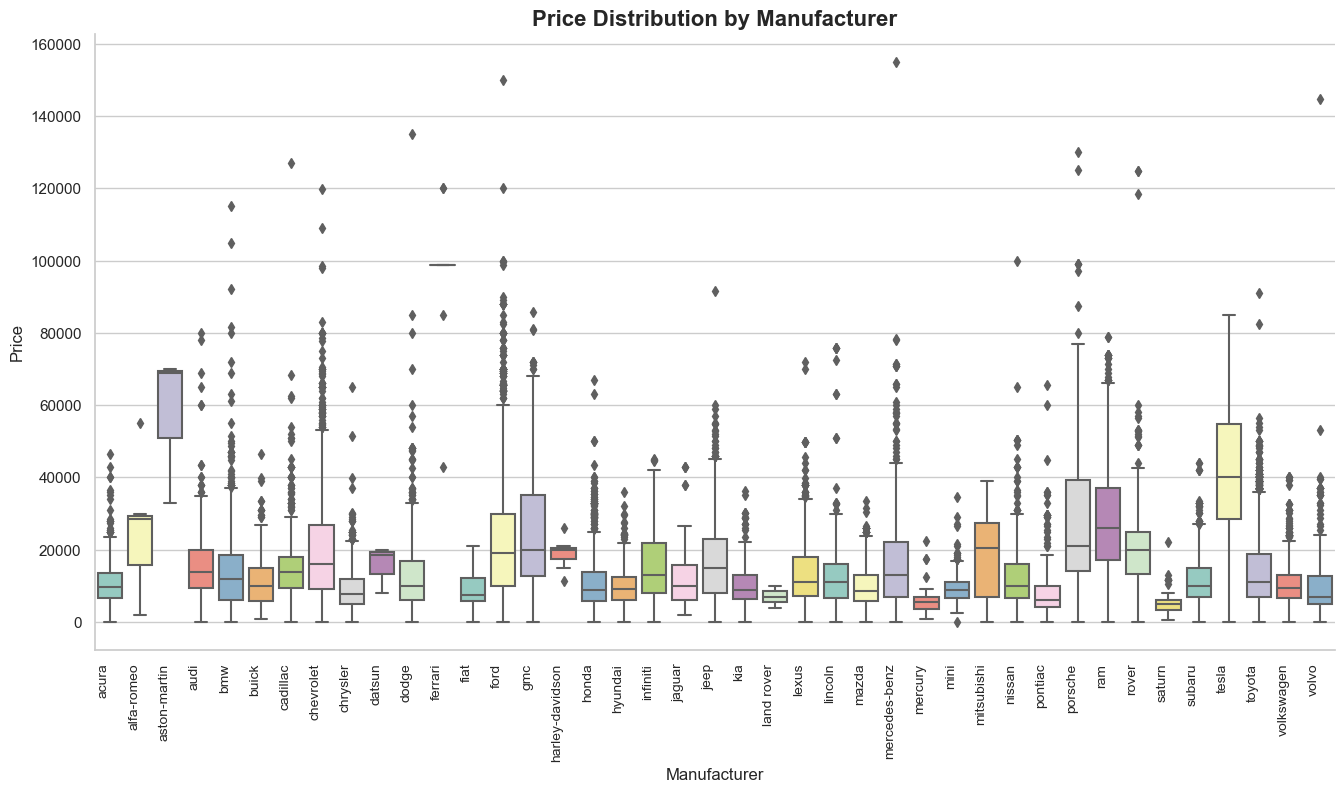

In [189]:
plot_box(vehicles_df.copy().sort_values(by='manufacturer'), 'manufacturer', 'price', 'Manufacturer', 'Price', 'Price Distribution by Manufacturer', figsize=(16, 8))

*thoughts:*  This a more managable dimension which could also be a good indicator of price (ferrari for example)

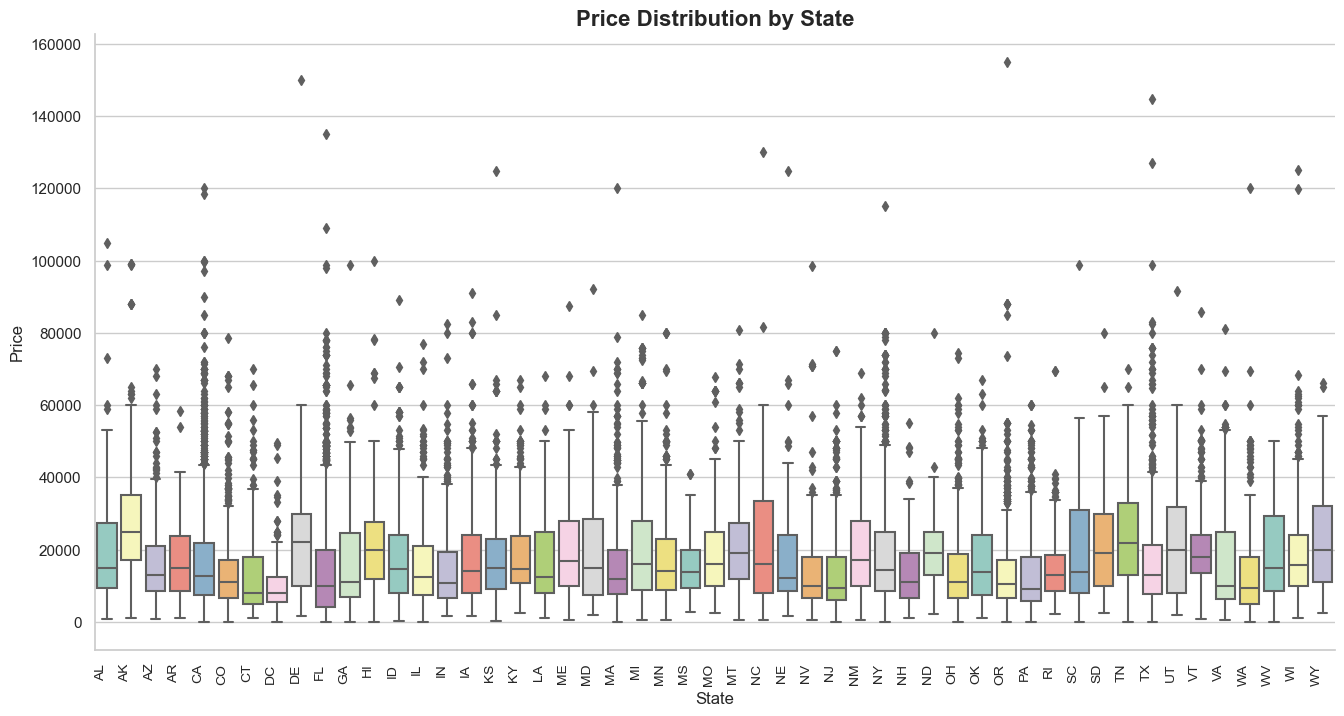

In [190]:

# uppercase the state column
tmp_df = vehicles_df.copy()

tmp_df['state'] = vehicles_df['state'].str.upper()
# plot_box by state
plot_box(tmp_df, 'state', 'price', 'State', 'Price', 'Price Distribution by State', figsize=(16, 8))

*thoughts:*  I don't see a clear winner here. I don't see the need of removing records from this dimension

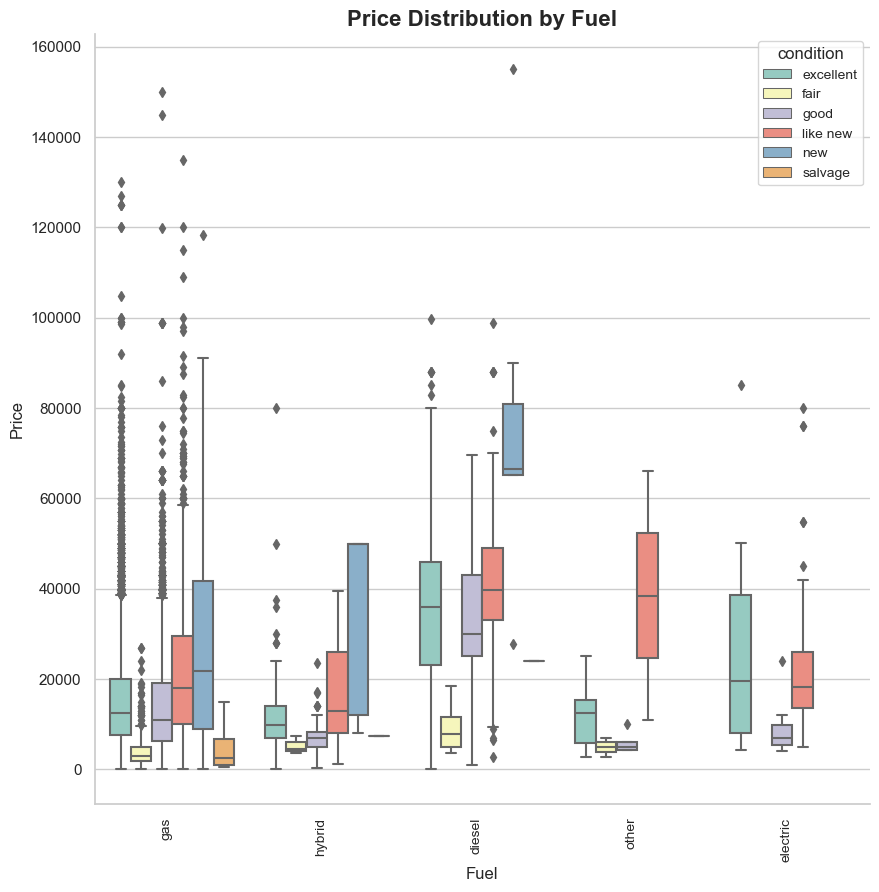

In [191]:
# plot_box by fuel and condition
plot_box(vehicles_df, 'fuel', 'price', 'Fuel', 'Price', 'Price Distribution by Fuel', hue='condition', figsize=(10, 10))

*thoughts:*  The newer the better, regardless of the fuel type

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [192]:
price_df = vehicles_df.copy()

#### 1. Droping columns

I will remove some features that are not adding much value or would be computacionally expensive to process. Region is way too specific, specially when there's a state dimension


In [193]:
price_df = price_df.drop(columns=['id','region', 'VIN'], axis=1)
price_df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
215,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al
219,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al
268,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,rwd,compact,convertible,white,al
337,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
338,4000,1972.0,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,rwd,full-size,coupe,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426785,23495,2015.0,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,4wd,full-size,truck,black,wy
426788,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,wy
426792,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,wy
426793,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan,black,wy


#### 2. Column Transformation


Given the insights recollected above, I'll try to "normalize" the each dimension as much as possible in hopes of getting better results when fitting a model(s).

*column:* year

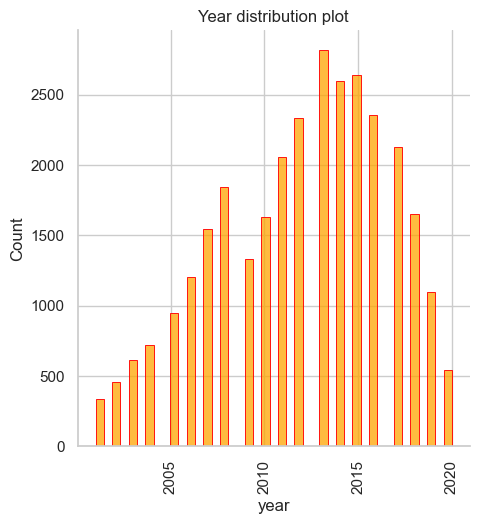

In [194]:
plot_hist(vehicles_df.query('year > 2000 and year <= 2020')['year'], 'Year distribution plot')

In [195]:
# convert to date
price_df['year'] = pd.to_datetime(price_df['year'], format='%Y').dt.year
price_df = price_df.query('year > 2000 and year <= 2020')
price_df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
215,4000,2002,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al
268,9000,2008,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,rwd,compact,convertible,white,al
337,8950,2011,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
346,98900,2001,ferrari,360 modena,good,8 cylinders,gas,20187.0,clean,automatic,rwd,mid-size,convertible,red,al
355,9400,2008,mercedes-benz,benz c350,good,6 cylinders,gas,129473.0,clean,automatic,rwd,full-size,sedan,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426784,24995,2014,gmc,sierra,good,8 cylinders,gas,128722.0,clean,automatic,4wd,full-size,truck,white,wy
426785,23495,2015,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,4wd,full-size,truck,black,wy
426788,12995,2016,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,wy
426792,32999,2014,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,wy


*column:* price

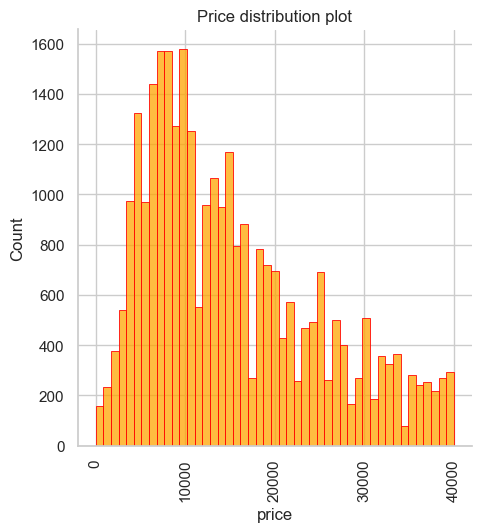

In [196]:
plot_hist(vehicles_df.query('price > 10 and price < 40000')['price'], 'Price distribution plot')

In [197]:
# some weirdly low prices below $100 will be removed
price_df = price_df.query('price > 10 and price < 40000')
price_df


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
215,4000,2002,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al
268,9000,2008,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,rwd,compact,convertible,white,al
337,8950,2011,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
355,9400,2008,mercedes-benz,benz c350,good,6 cylinders,gas,129473.0,clean,automatic,rwd,full-size,sedan,silver,al
364,7300,2007,lexus,rx350,good,6 cylinders,gas,181000.0,clean,automatic,fwd,mid-size,SUV,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426784,24995,2014,gmc,sierra,good,8 cylinders,gas,128722.0,clean,automatic,4wd,full-size,truck,white,wy
426785,23495,2015,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,4wd,full-size,truck,black,wy
426788,12995,2016,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,wy
426792,32999,2014,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,wy


*column:* model

In [198]:
top_50_models = price_df['model'].value_counts().sort_values(ascending=False).head(50).index.tolist()
price_df = price_df[price_df['model'].isin(top_50_models)]

# price_df['model'] = pd.factorize(price_df['model'])[0]+1

price_df


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
337,8950,2011,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
373,8900,2013,toyota,prius,excellent,4 cylinders,hybrid,142900.0,clean,automatic,fwd,mid-size,wagon,blue,al
381,10800,2013,toyota,camry,excellent,4 cylinders,hybrid,147000.0,clean,automatic,fwd,mid-size,sedan,grey,al
432,6950,2011,volkswagen,jetta,excellent,5 cylinders,gas,116000.0,clean,automatic,fwd,full-size,sedan,silver,al
651,8950,2011,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426737,2500,2005,honda,civic,good,4 cylinders,gas,185000.0,clean,manual,fwd,compact,sedan,grey,wy
426768,24995,2014,jeep,grand cherokee,good,8 cylinders,gas,95704.0,clean,automatic,4wd,full-size,SUV,white,wy
426772,32995,2014,ram,3500,good,8 cylinders,gas,137499.0,clean,automatic,4wd,full-size,truck,brown,wy
426779,5995,2004,chevrolet,colorado,good,5 cylinders,gas,233011.0,clean,manual,4wd,full-size,truck,white,wy


*column:* condition

In [199]:
# no new cars are requested by the business
price_df = price_df.query('condition != "new"')

# mapping into numeric values
condition_mapping = {'condition': {'salvage': 1, 'fair': 2, 'good': 3, 'excellent': 4, 'like new': 5 } }
price_df = price_df.replace(condition_mapping)
price_df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
337,8950,2011,ford,f-150,4,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
373,8900,2013,toyota,prius,4,4 cylinders,hybrid,142900.0,clean,automatic,fwd,mid-size,wagon,blue,al
381,10800,2013,toyota,camry,4,4 cylinders,hybrid,147000.0,clean,automatic,fwd,mid-size,sedan,grey,al
432,6950,2011,volkswagen,jetta,4,5 cylinders,gas,116000.0,clean,automatic,fwd,full-size,sedan,silver,al
651,8950,2011,ford,f-150,4,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426737,2500,2005,honda,civic,3,4 cylinders,gas,185000.0,clean,manual,fwd,compact,sedan,grey,wy
426768,24995,2014,jeep,grand cherokee,3,8 cylinders,gas,95704.0,clean,automatic,4wd,full-size,SUV,white,wy
426772,32995,2014,ram,3500,3,8 cylinders,gas,137499.0,clean,automatic,4wd,full-size,truck,brown,wy
426779,5995,2004,chevrolet,colorado,3,5 cylinders,gas,233011.0,clean,manual,4wd,full-size,truck,white,wy


*column:* paint_color

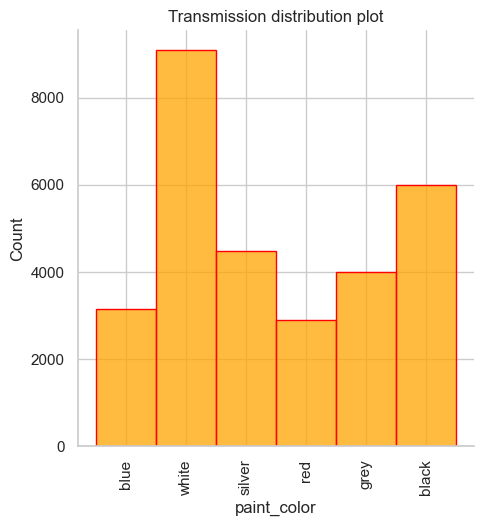

In [200]:
plot_hist(vehicles_df[vehicles_df['paint_color'].isin(['blue','white','silver','red','grey','black'])]['paint_color'], 'Transmission distribution plot')

In [201]:
vehicles_df = vehicles_df[vehicles_df['paint_color'].isin(['blue','white','silver','red','grey','black'])]
vehicles_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al
268,7315946365,birmingham,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,JM1NC25F570128735,rwd,compact,convertible,white,al
337,7315354216,birmingham,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,1FTMF1CM6BKD55331,fwd,full-size,truck,white,al
338,7315349921,birmingham,4000,1972.0,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,1.14023E+13,rwd,full-size,coupe,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426784,7303328776,wyoming,24995,2014.0,gmc,sierra,good,8 cylinders,gas,128722.0,clean,automatic,1GT423CG6EF114143,4wd,full-size,truck,white,wy
426785,7303314912,wyoming,23495,2015.0,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,1FTFX1EF5FFC24427,4wd,full-size,truck,black,wy
426788,7303227528,wyoming,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,1G1BE5SM0G7266569,fwd,compact,sedan,silver,wy
426793,7303112347,wyoming,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,1G1BE5SM7J7133704,fwd,mid-size,sedan,black,wy


*column:* manufacturer

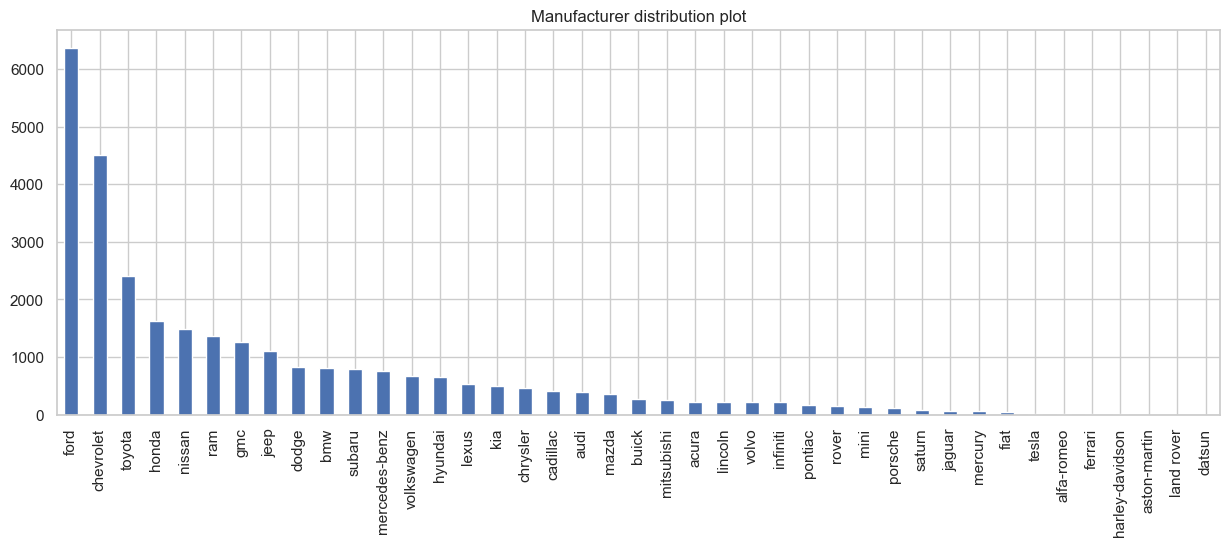

In [202]:
vehicles_df['manufacturer'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(15, 5))
plt.title('Manufacturer distribution plot')
plt.show()

Theres very few records of ferrari, harley-davidson, datsun, aston-martin, land rover. Also causing price outliers... I'll remove them.

In [203]:
price_df = price_df[~price_df['manufacturer'].isin(['ferrari', 'harley-davidson', 'datsun', 'aston-martin','land rover'])]
price_df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
337,8950,2011,ford,f-150,4,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
373,8900,2013,toyota,prius,4,4 cylinders,hybrid,142900.0,clean,automatic,fwd,mid-size,wagon,blue,al
381,10800,2013,toyota,camry,4,4 cylinders,hybrid,147000.0,clean,automatic,fwd,mid-size,sedan,grey,al
432,6950,2011,volkswagen,jetta,4,5 cylinders,gas,116000.0,clean,automatic,fwd,full-size,sedan,silver,al
651,8950,2011,ford,f-150,4,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426737,2500,2005,honda,civic,3,4 cylinders,gas,185000.0,clean,manual,fwd,compact,sedan,grey,wy
426768,24995,2014,jeep,grand cherokee,3,8 cylinders,gas,95704.0,clean,automatic,4wd,full-size,SUV,white,wy
426772,32995,2014,ram,3500,3,8 cylinders,gas,137499.0,clean,automatic,4wd,full-size,truck,brown,wy
426779,5995,2004,chevrolet,colorado,3,5 cylinders,gas,233011.0,clean,manual,4wd,full-size,truck,white,wy


*column:* title_status

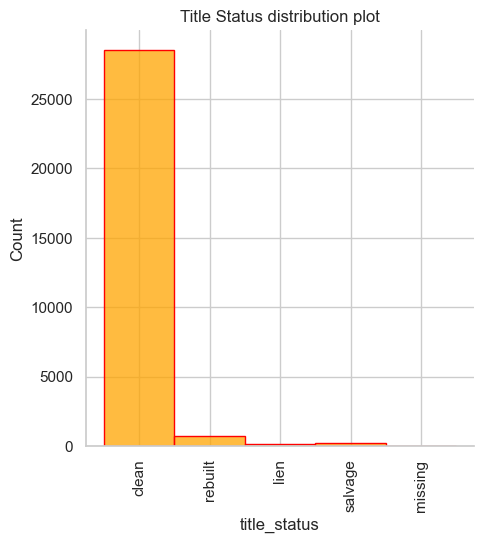

In [204]:
plot_hist(vehicles_df.query('title_status != "parts only"')['title_status'], 'Title Status distribution plot') # odometer > 0 & 

In [205]:
price_df = price_df.query('title_status != "parts only"')
price_df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
337,8950,2011,ford,f-150,4,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
373,8900,2013,toyota,prius,4,4 cylinders,hybrid,142900.0,clean,automatic,fwd,mid-size,wagon,blue,al
381,10800,2013,toyota,camry,4,4 cylinders,hybrid,147000.0,clean,automatic,fwd,mid-size,sedan,grey,al
432,6950,2011,volkswagen,jetta,4,5 cylinders,gas,116000.0,clean,automatic,fwd,full-size,sedan,silver,al
651,8950,2011,ford,f-150,4,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426737,2500,2005,honda,civic,3,4 cylinders,gas,185000.0,clean,manual,fwd,compact,sedan,grey,wy
426768,24995,2014,jeep,grand cherokee,3,8 cylinders,gas,95704.0,clean,automatic,4wd,full-size,SUV,white,wy
426772,32995,2014,ram,3500,3,8 cylinders,gas,137499.0,clean,automatic,4wd,full-size,truck,brown,wy
426779,5995,2004,chevrolet,colorado,3,5 cylinders,gas,233011.0,clean,manual,4wd,full-size,truck,white,wy


*column:* odometer

In [206]:
vehicles_df['odometer'].describe()

count    2.959900e+04
mean     1.081258e+05
std      1.037086e+05
min      0.000000e+00
25%      6.606900e+04
50%      1.049160e+05
75%      1.420000e+05
max      9.999999e+06
Name: odometer, dtype: float64

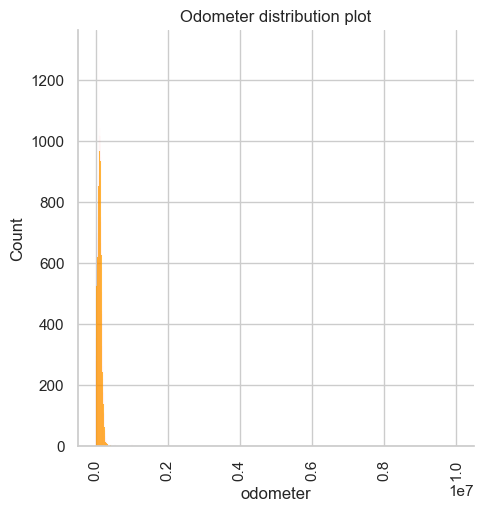

In [207]:
# raise Exception('stop here')
plot_hist(vehicles_df.query("odometer > 1")['odometer'], 'Odometer distribution plot') # odometer > 0 & 

In [208]:
vehicles_df = vehicles_df.query("odometer > 1")
vehicles_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al
268,7315946365,birmingham,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,JM1NC25F570128735,rwd,compact,convertible,white,al
337,7315354216,birmingham,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,1FTMF1CM6BKD55331,fwd,full-size,truck,white,al
338,7315349921,birmingham,4000,1972.0,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,1.14023E+13,rwd,full-size,coupe,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426784,7303328776,wyoming,24995,2014.0,gmc,sierra,good,8 cylinders,gas,128722.0,clean,automatic,1GT423CG6EF114143,4wd,full-size,truck,white,wy
426785,7303314912,wyoming,23495,2015.0,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,1FTFX1EF5FFC24427,4wd,full-size,truck,black,wy
426788,7303227528,wyoming,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,1G1BE5SM0G7266569,fwd,compact,sedan,silver,wy
426793,7303112347,wyoming,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,1G1BE5SM7J7133704,fwd,mid-size,sedan,black,wy


The rest of the categorical columns can be handled by the model pipe

In [209]:
categorical_variables = price_df.select_dtypes(include='object').columns.tolist()

pd.DataFrame(categorical_variables, columns=['categorical variables'])


,categorical variables
0,manufacturer
1,model
2,cylinders
3,fuel
4,title_status
5,transmission
6,drive
7,size
8,type
9,paint_color


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Preparing to fit the model

Since I removed some columns and records. I'm going to crunch the dataset to have a unique combination of the categorical values in preparation to fit the model(s)

In [210]:
price_df = pd.DataFrame(price_df.groupby(price_df.select_dtypes(include='object').columns.tolist() + ['year'], as_index=False).mean())
price_df

,manufacturer,model,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state,year,price,condition,odometer
0,chevrolet,2500,8 cylinders,gas,clean,automatic,4wd,full-size,truck,white,or,2017,35999.0,3.0,73225.0
1,chevrolet,3500,8 cylinders,diesel,clean,automatic,rwd,full-size,truck,white,ok,2005,9250.0,2.0,278511.0
2,chevrolet,3500,8 cylinders,gas,clean,automatic,rwd,full-size,pickup,white,tx,2011,15995.0,3.0,190000.0
3,chevrolet,colorado,4 cylinders,gas,clean,automatic,4wd,mid-size,pickup,red,ia,2011,13500.0,3.0,80725.0
4,chevrolet,colorado,4 cylinders,gas,clean,automatic,4wd,mid-size,pickup,white,az,2015,16995.0,4.0,137501.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5664,volkswagen,jetta,5 cylinders,gas,clean,manual,fwd,mid-size,sedan,grey,co,2015,10249.0,4.0,46855.0
5665,volkswagen,jetta,5 cylinders,gas,salvage,automatic,fwd,mid-size,sedan,grey,nj,2010,3700.0,3.0,114000.0
5666,volkswagen,jetta,6 cylinders,gas,clean,automatic,fwd,mid-size,sedan,red,ia,2016,12950.0,5.0,70350.0
5667,volkswagen,jetta,6 cylinders,gas,clean,automatic,rwd,full-size,sedan,red,fl,2010,9995.0,4.0,105834.0


Preparing the model dataframe

In [211]:

model_df = price_df.copy()
X = model_df.drop(columns=['price'], axis=1)
y = model_df['price']

Preparing the train and test datasets for cross-validation

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [213]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3968 entries, 2862 to 2933
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  3968 non-null   object 
 1   model         3968 non-null   object 
 2   cylinders     3968 non-null   object 
 3   fuel          3968 non-null   object 
 4   title_status  3968 non-null   object 
 5   transmission  3968 non-null   object 
 6   drive         3968 non-null   object 
 7   size          3968 non-null   object 
 8   type          3968 non-null   object 
 9   paint_color   3968 non-null   object 
 10  state         3968 non-null   object 
 11  year          3968 non-null   int64  
 12  condition     3968 non-null   float64
 13  odometer      3968 non-null   float64
dtypes: float64(2), int64(1), object(11)
memory usage: 465.0+ KB


Selecting catergorical values to deal with them in the pipe

In [214]:
category_columns = X_train.select_dtypes(include=['object']).columns.tolist()
category_columns

['manufacturer',
 'model',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

#### Fitting the models

I'll try a Ridge model first:

In [215]:

# Define the parameter grid for GridSearchCV

ridge_param_grid = {
    'model__alpha': [0,0.1,1.0,10.0]
}

ridge_etl = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=np.object_)),
    (StandardScaler(), make_column_selector(dtype_include=np.number))
)

# Pipeline

ridge_pipe = Pipeline([
    ('etl', ridge_etl),
    ('model', Ridge())
])

# Create an instance of GridSearchCV with the pipeline and parameter grid
ridge_grid_search = GridSearchCV(ridge_pipe, ridge_param_grid, verbose=1)

# Fit the grid search to your data
ridge_grid_search.fit(X_train, y_train)  # X and y are your input features and target variable

# Get the best estimator and best parameters
ridge_best_estimator = ridge_grid_search.best_estimator_
ridge_best_params = ridge_grid_search.best_params_

# print training and test scores

print(f' --------------------------- \n Ridge train score: {ridge_grid_search.score(X_train, y_train)} \n ---------------------------')
ridge_grid_search.cv_results_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
 --------------------------- 
 Ridge train score: 0.8318843926953808 
 ---------------------------


{'mean_fit_time': array([0.02630744, 0.02343159, 0.02160783, 0.01823616]),
 'std_fit_time': array([0.00179248, 0.00089748, 0.00044633, 0.00044291]),
 'mean_score_time': array([0.00617533, 0.0060452 , 0.00593381, 0.00575266]),
 'std_score_time': array([0.00039678, 0.00036986, 0.00034914, 0.0004625 ]),
 'param_model__alpha': masked_array(data=[0, 0.1, 1.0, 10.0],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'model__alpha': 0},
  {'model__alpha': 0.1},
  {'model__alpha': 1.0},
  {'model__alpha': 10.0}],
 'split0_test_score': array([0.81270211, 0.81305685, 0.81336321, 0.81072237]),
 'split1_test_score': array([0.81551021, 0.81511879, 0.81434961, 0.80585456]),
 'split2_test_score': array([0.80076766, 0.80097327, 0.80086742, 0.79314394]),
 'split3_test_score': array([0.80649929, 0.80628842, 0.80618422, 0.80433334]),
 'split4_test_score': array([0.83099741, 0.83078079, 0.82914388, 0.82086382]),
 'mean_test_score': array([0.8

I'll also try a Linear Regresion model:

In [216]:

# Define the parameter grid for GridSearchCV
lr_param_grid = {
    'etl__polynomialfeatures__degree': [3, 4, 5, 2],
    'model__normalize': [True, False]
}


lr_etl = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=np.object_)),
    (StandardScaler(), make_column_selector(dtype_include=np.number)),
    (PolynomialFeatures(), make_column_selector(dtype_include=np.number)),
    remainder='passthrough'
)

# Pipeline

lr_pipe = Pipeline([
    ('etl', lr_etl),
    ('model', LinearRegression())
])

# Create an instance of GridSearchCV with the pipeline and parameter grid
lr_grid_search = GridSearchCV(lr_pipe, lr_param_grid, cv=5, verbose=1)

# Fit the grid search to your data
lr_grid_search.fit(X_train, y_train)  # X and y are your input features and target variable

# Get the best estimator and best parameters
lr_best_estimator = lr_grid_search.best_estimator_
lr_best_params = lr_grid_search.best_params_

print(f' --------------------------- \n LR train score: {lr_best_estimator.score(X_train, y_train)} \n ---------------------------')
lr_grid_search.cv_results_


Fitting 5 folds for each of 8 candidates, totalling 40 fits
 --------------------------- 
 LR train score: 0.8550235723221172 
 ---------------------------


{'mean_fit_time': array([0.0824882 , 0.02041392, 0.14363599, 0.02283378, 0.03392572,
        0.0266252 , 0.05503383, 0.01884117]),
 'std_fit_time': array([0.00460433, 0.00061402, 0.01939061, 0.00023571, 0.00304785,
        0.00053629, 0.00437671, 0.00078704]),
 'mean_score_time': array([0.00832257, 0.00799565, 0.00895743, 0.00887642, 0.0083313 ,
        0.0080442 , 0.00803738, 0.00745115]),
 'std_score_time': array([0.00053333, 0.00053508, 0.00093073, 0.00023774, 0.00060903,
        0.0005123 , 0.00024604, 0.00043833]),
 'param_etl__polynomialfeatures__degree': masked_array(data=[3, 3, 4, 4, 5, 5, 2, 2],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_model__normalize': masked_array(data=[True, False, True, False, True, False, True, False],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'etl__polynomialfe

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Linear Regression evaluation

In [217]:
lr_grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('etl',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f7b028f6760>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f7ace6047f0>),
                                                                        ('polynomialfeatures',
                                                                         PolynomialFeatures(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f7ace604640>)])),
                                       ('model', LinearRegression())]),
             param_grid={'etl__polynomialfeatures__degree': [3, 4, 5, 2],
                         'model__normalize': [True, False]},
             verbose=1)

In [218]:
lr_best_estimator.score(X_test, y_test)


0.8627478459281825

I like the results of this model. A R squared of **0.86** is pretty good.

#### Ridge evaluation

In [219]:
ridge_grid_search

GridSearchCV(estimator=Pipeline(steps=[('etl',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f7b02905520>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f7ace62e970>)])),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [0, 0.1, 1.0, 10.0]}, verbose=1)

In [220]:
ridge_best_estimator.score(X_test, y_test)

0.8408780534226297

I like the results of this model as well. A R squared of **0.84** is pretty good. But of course, the linear regression model wins this time.

#### Looking closer at the predictions

In [221]:
test_results_df = pd.DataFrame(y_test.copy())
test_results_df.rename(columns={'price': 'aPrice'}, inplace=True)
test_results_df['pPrice'] = lr_best_estimator.predict(X_test)
test_results_df.reset_index(inplace=True)
test_results_df.drop(columns=['index'], inplace=True)
test_results_df

,aPrice,pPrice
0,6895.0,12223.673589
1,9999.0,9822.336548
2,24900.0,19014.708215
3,6999.0,8701.984580
4,14427.0,16868.826360
...,...,...
1696,16995.0,23570.205875
1697,28995.0,29743.648563
1698,24995.0,20089.718945
1699,29995.0,32056.372309


In [237]:
# Convert DataFrame to long-form

melted_df = test_results_df.copy()
melted_df.reset_index(inplace=True)
melted_df.sort_values(by='aPrice', inplace=True, ascending=False)
melted_df = melted_df.melt(id_vars='index', value_vars=['aPrice', 'pPrice'], var_name='Price Type', value_name='Price')

melted_df.drop(columns=['index'], inplace=True)
melted_df.reset_index(inplace=True)
melted_df

,index,Price Type,Price
0,0,aPrice,39995.000000
1,1,aPrice,39995.000000
2,2,aPrice,39995.000000
3,3,aPrice,39950.000000
4,4,aPrice,39901.000000
...,...,...,...
3397,3397,pPrice,4750.726623
3398,3398,pPrice,15144.904971
3399,3399,pPrice,14015.869536
3400,3400,pPrice,3684.786958


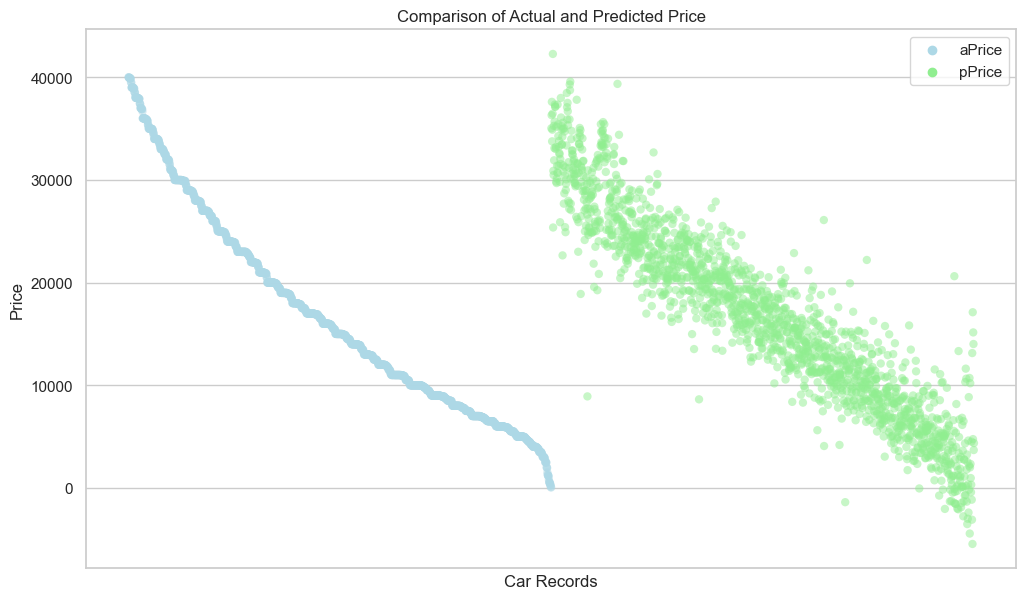

In [249]:
# Set the style of the plot
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(12, 7))

# Create the scatter plot
sns.scatterplot(data=melted_df, x='index', y='Price', hue='Price Type', palette=['lightblue', 'lightgreen'], alpha=0.5, edgecolor='black', linewidth=0)

# Set the title and labels
plt.title('Comparison of Actual and Predicted Price')
plt.xlabel('Car Records')
plt.ylabel('Price')

#remove xticks
plt.xticks([])

# Adjust legend position
plt.legend(loc='upper right')

# save the plot
plt.savefig('images/actual_vs_predicted.png', dpi=300)

# Display the plot
plt.show()

*thoughts:* 
- I notice some predictions are negative - which doesn't make sense. Maybe related to the fact that some coeficients are negative?
- I can see the predictions following the right pattern - I'm happy with the results the model

In [223]:
pred_error = pd.DataFrame(abs(test_results_df['aPrice'] - test_results_df['pPrice']), columns=['absoulte_error'])
pred_error.reset_index(inplace=True)

# calculate MAE
mae = pred_error.mean()

# print mae
print(f'MAE: {mae[0]}')


pred_error

MAE: 850.0


,index,absoulte_error
0,0,5328.673589
1,1,176.663452
2,2,5885.291785
3,3,1702.984580
4,4,2441.826360
...,...,...
1696,1696,6575.205875
1697,1697,748.648563
1698,1698,4905.281055
1699,1699,2061.372309


#### A closer look to the absolute error

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


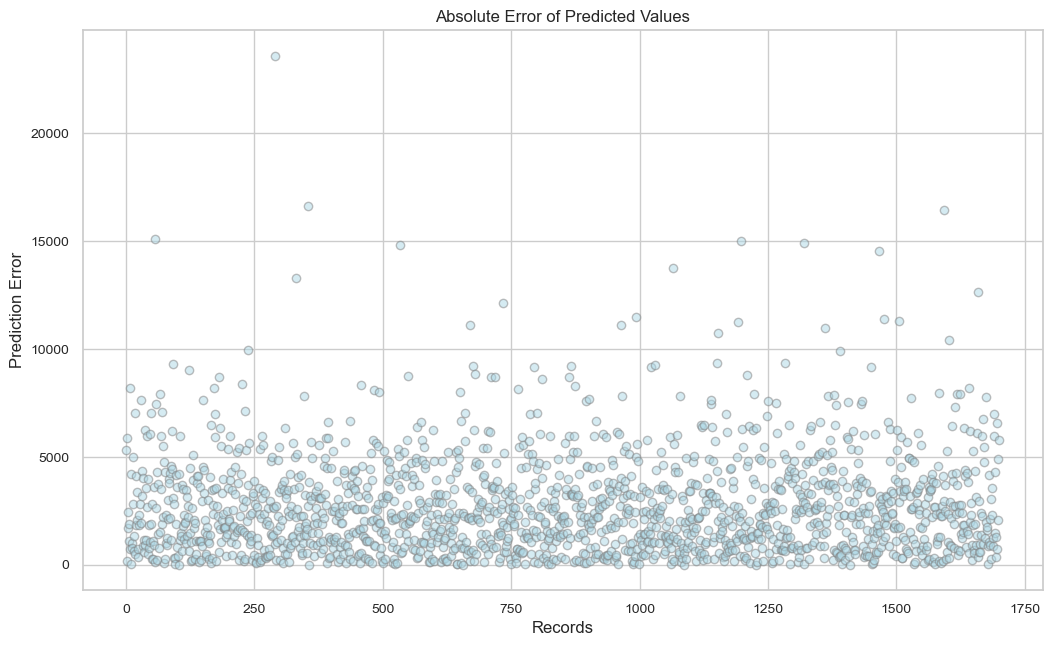

In [248]:
# Set the style of the plot
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(12, 7))

# Create the scatter plot
sns.scatterplot(x=pred_error.index, y=pred_error['absoulte_error'], color='lightblue', edgecolor='gray', linewidth=1, alpha=0.5)

# Set the title and labels
plt.title('Absolute Error of Predicted Values')
plt.xlabel('Records')
plt.ylabel('Prediction Error')

# Set the plot background color
plt.gca().set_facecolor('white')


# Remove the legend
plt.legend().remove()

# Adjust the plot margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Adjust the tick font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# save the plot
plt.savefig('images/absolute_error.png', dpi=300)

# Display the plot
plt.show()



#### Feature Importance Analysis

pulling feature names generated by the linear regression model

In [225]:
feature_names = lr_best_estimator.named_steps['etl'].get_feature_names_out()

pulling the coeficients generated by the linear regression model

In [226]:
coefficients = lr_best_estimator.named_steps['model'].coef_

creating a dataframe with coeficients and feature names for further analysis

In [227]:
coefs_df = pd.DataFrame({'coefficient':coefficients}, index = feature_names).sort_values(by='coefficient')
coefs_df.reset_index(inplace=True)

# rename index to feature
coefs_df.rename(columns={'index': 'feature'}, inplace=True)

#### Plotting coeficients in descending order

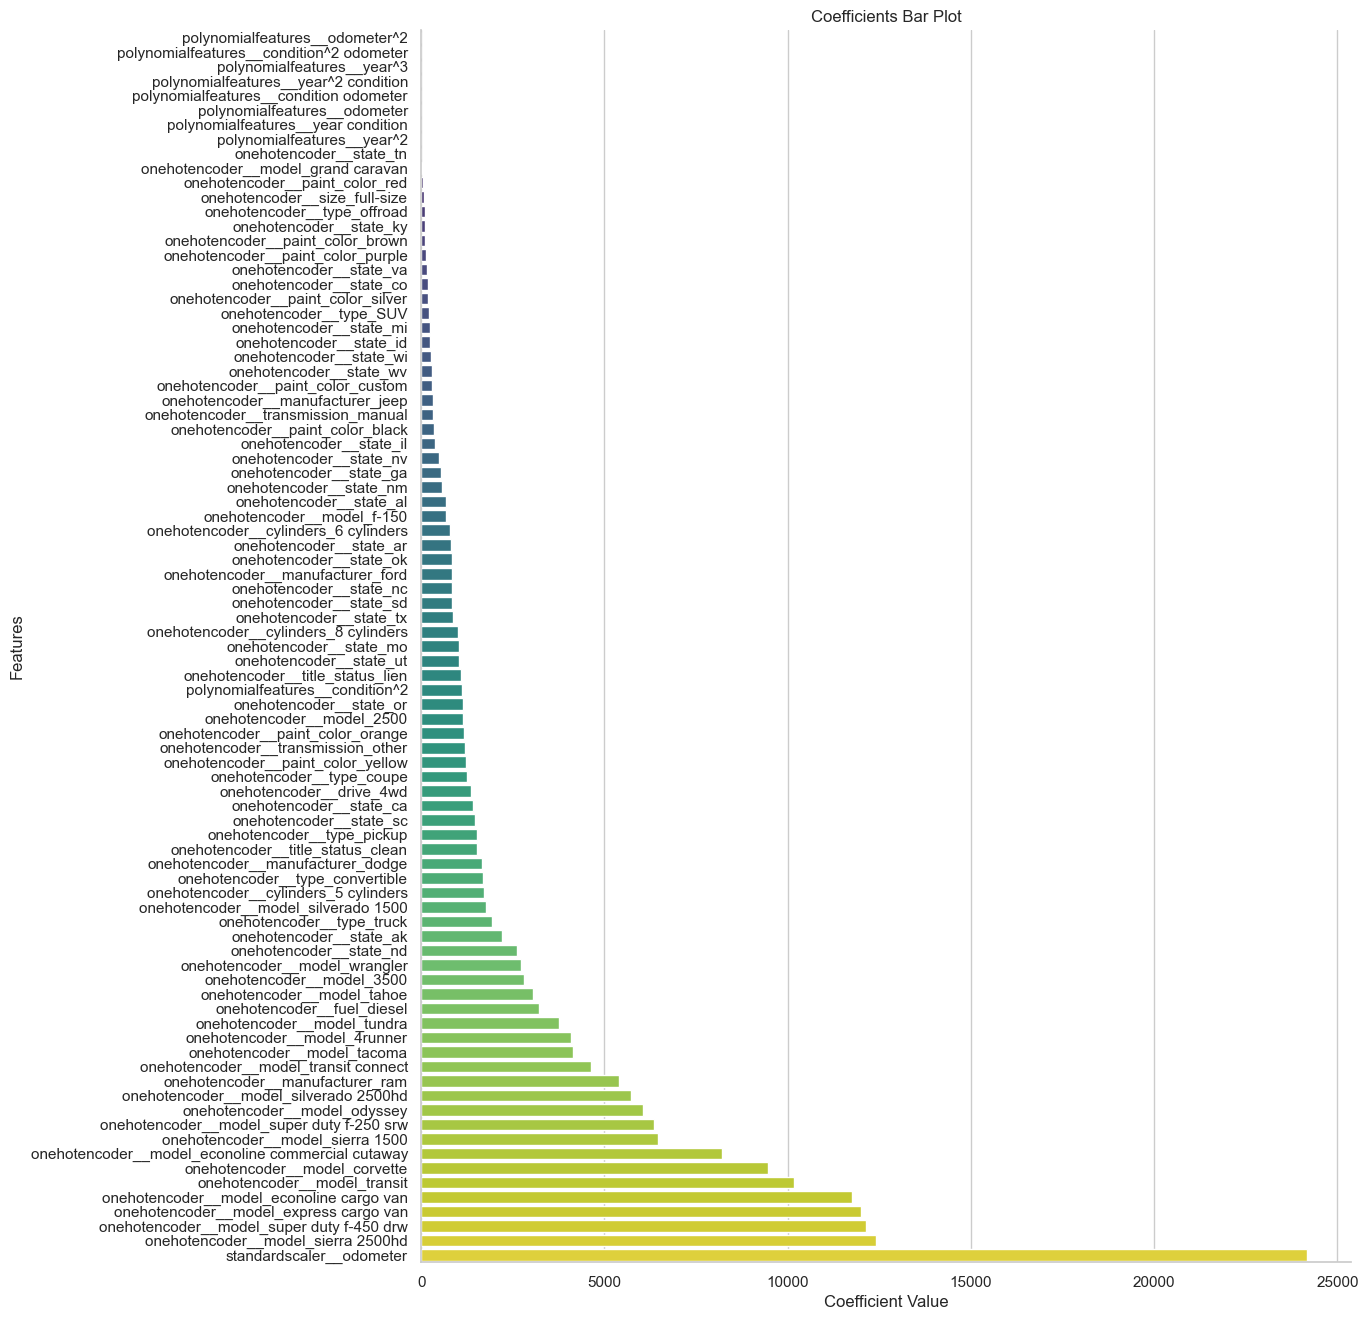

In [228]:
coefs_plot_df = coefs_df.query('coefficient > 0')

# Set the style of the plot
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(12, 16))

# Create the bar plot
sns.barplot(x=coefs_plot_df['coefficient'], y=coefs_plot_df['feature'], palette='viridis')

# Set the title and labels
plt.title('Coefficients Bar Plot')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

# Remove the top and right spines
sns.despine()

# Display the plot
plt.show()


*thoughts*: the odometer has the highest coeficient by far. My guess is it should be one of the most important features to predict price

#### Applying permutation importance

In [229]:
r = permutation_importance(lr_grid_search, X_test, y_test, n_repeats=30, random_state=22)
r

{'importances_mean': array([ 9.40430185e-02,  5.12130033e-01,  3.11599301e-02,  2.02677695e-02,
         6.22714556e-03,  9.50928739e-04,  2.98365114e-02, -8.86070939e-05,
         1.22047140e-01,  1.48319185e-03,  1.58337118e-02,  4.91019897e-01,
         2.66193835e-03,  1.65320288e-01]),
 'importances_std': array([0.00369115, 0.01343172, 0.00226004, 0.00252469, 0.00089964,
        0.00048152, 0.00263879, 0.00016782, 0.00576989, 0.00057197,
        0.00191883, 0.0147948 , 0.00057926, 0.00555644]),
 'importances': array([[ 8.76687140e-02,  9.82723557e-02,  9.10939450e-02,
          8.94896204e-02,  9.26899138e-02,  9.18814695e-02,
          9.81558526e-02,  9.61249682e-02,  1.00496035e-01,
          9.01389344e-02,  9.18324603e-02,  9.83869930e-02,
          9.29642227e-02,  9.84698027e-02,  9.58161473e-02,
          9.32427365e-02,  9.07433631e-02,  9.48229972e-02,
          9.00245008e-02,  9.65808174e-02,  8.66334620e-02,
          9.19705569e-02,  9.37000696e-02,  1.01949248e-01,


Creating a dataframe with the importance coeficients generated by the model

In [230]:
feature_importances = pd.DataFrame(r.importances, index = X_test.columns).T
feature_importances

,manufacturer,model,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state,year,condition,odometer
0,0.087669,0.501131,0.029901,0.018158,0.008537,0.001697,0.034415,-0.000278,0.117788,0.001920,0.015561,0.462631,0.003801,0.162513
1,0.098272,0.522106,0.031369,0.017093,0.005344,0.000766,0.028870,-0.000068,0.127456,0.002015,0.019696,0.501127,0.002796,0.155302
2,0.091094,0.511596,0.030863,0.020394,0.005608,0.001118,0.029319,-0.000322,0.122197,0.001238,0.014561,0.489601,0.002898,0.165297
3,0.089490,0.525878,0.030622,0.021968,0.005896,0.000621,0.032348,-0.000120,0.124616,0.002176,0.015528,0.525586,0.003371,0.168839
4,0.092690,0.511351,0.031341,0.021413,0.006587,0.001156,0.033852,-0.000096,0.125238,0.002386,0.015474,0.501781,0.001944,0.168972
5,0.091881,0.528707,0.032683,0.018503,0.005195,0.000754,0.029150,0.000043,0.119153,0.001551,0.013753,0.488422,0.003190,0.162786
6,0.098156,0.514684,0.031626,0.023195,0.006074,0.000706,0.025604,-0.000017,0.123261,0.001348,0.016738,0.495182,0.002320,0.162857
7,0.096125,0.470575,0.026829,0.020277,0.005512,0.001183,0.028070,-0.000252,0.115919,0.000916,0.014407,0.478835,0.003141,0.162160
8,0.100496,0.519496,0.030495,0.016736,0.004576,0.001499,0.031128,-0.000200,0.123407,0.001215,0.014115,0.501212,0.002969,0.168442
9,0.090139,0.487215,0.026147,0.016521,0.005829,0.000064,0.028355,-0.000302,0.106296,0.002243,0.016816,0.500018,0.003224,0.171441


creating a ranking of importance of the features

In [231]:
top_features_df = pd.DataFrame(feature_importances.mean().sort_values(ascending=False), columns=['importance'])
top_features_df

,importance
model,0.512130
year,0.491020
odometer,0.165320
type,0.122047
manufacturer,0.094043
cylinders,0.031160
drive,0.029837
fuel,0.020268
state,0.015834
title_status,0.006227


#### Analysing the results of permutacion importance

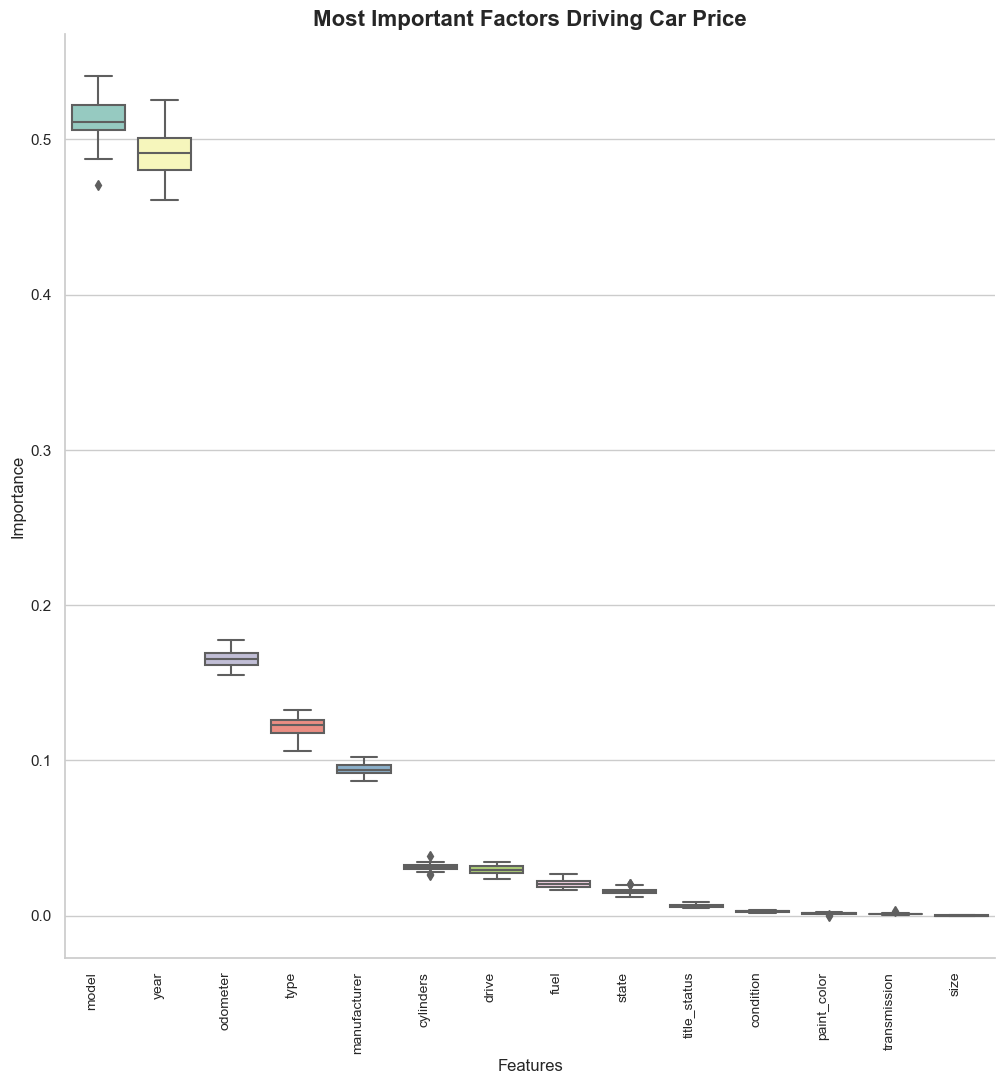

In [250]:


# # Melt the DataFrame to create a long-form DataFrame suitable for plotting with Plotly Express
melted_df = feature_importances[top_features_df.index.tolist()].melt(var_name='Feature', value_name='Importance')

plot_box(melted_df, 'Feature', 'Importance', 'Features', 'Importance', 'Most Important Factors Driving Car Price', figsize=(12, 12))

*conclusion*: Model and Year are the most important features when predicting the car price. The odometer is on the 3rd place but quite far. I thought it would be more important given the coeficient values

### Recomendations

In [269]:
top_price_df = vehicles_df.copy()

# mean price by model
top_price_df = pd.DataFrame(top_price_df.groupby(['model', 'year'], as_index=False).mean())

# top 10 models by price
top_price_df = top_price_df.sort_values(by=['year', 'price'], ascending=False).head(10)[['model', 'year', 'price']]

top_price_df


,model,year,price
3626,escalade,2021.0,126995.0
2631,corvette,2021.0,119900.0
9182,supercharged,2021.0,118300.0
6073,land cruiser,2021.0,90978.0
10564,yukon xl,2021.0,85867.0
9115,super duty f-250,2021.0,82900.0
8318,sierra 1500,2021.0,80870.0
9302,tahoe,2021.0,72900.0
254,2500 cummins 4x4,2021.0,71495.0
9090,suburban premier,2021.0,70590.0


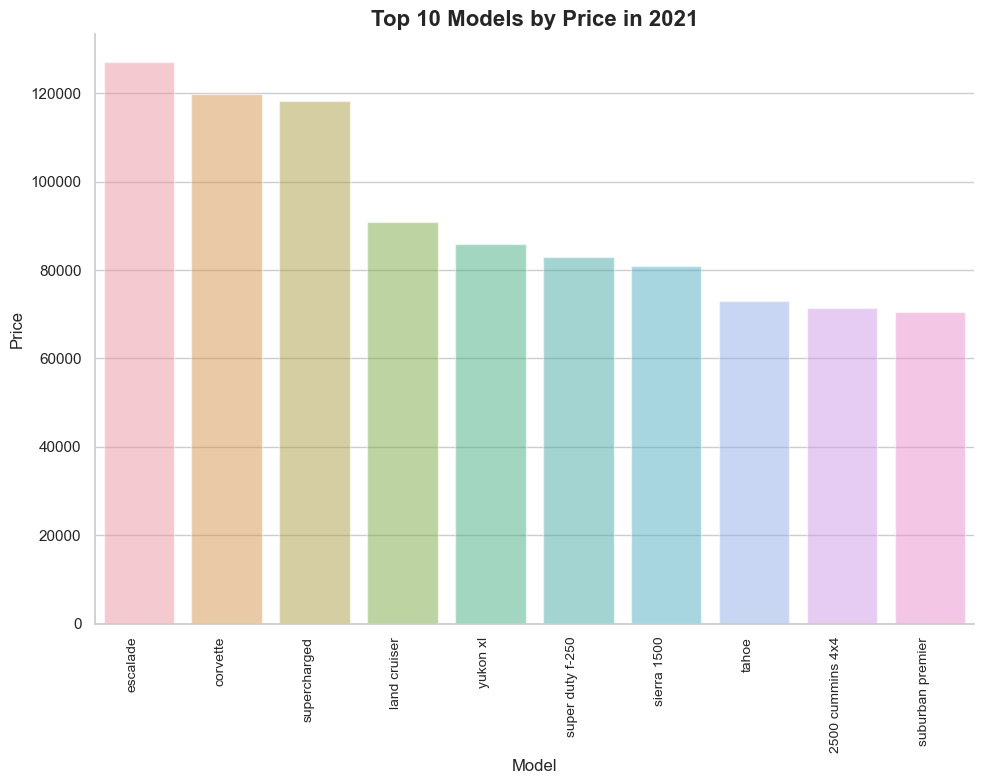

In [299]:
# plot the top 10 models by price
plot_bar(top_price_df, 'model', 'price', 'Model', 'Price', 'Top 10 Models by Price in 2021', alpha=0.5, figsize=(10, 8))

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.